#### [openCV - 이미지 채널 분리 & 병합]

- 채널 분리
    - 함수 : cv2.split(이미지 로우 데이터)
    - 결과 : 튜플 타입에 분리된 채널 데이터 반환

- 채널 병합
    - 함수 : cv2.merge(채널데이터, 채널 데이터, 채널 데이터)
    - 결과 : 합쳐진 이미지 로우 데이터
- 주의 : opencv 한글 미지원

In [33]:
## 이미지 처리 모듈
import cv2

##시각화 모듈
import matplotlib.pyplot as plt
# %pip install koreanize_matplotlib
import koreanize_matplotlib


In [63]:
img_file = '../Data/Image/ddd.png'
# img_file = '../Data/Image/flower_rainbow.jpg'


[2] 이미지 로딩 및 정보 확인 <hr>

In [64]:
## 원본 & 회색 로딩
org_img = cv2.imread(img_file)
gray_img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

In [65]:
## 이미지 데이터 정보 확인
print(f'[orinal image]')
print(f'형태 : {org_img.shape} / 차원 : {org_img.ndim}D / 사이즈 : {org_img.size}')

print(f'[gray image]')
print(f'형태 : {gray_img.shape} / 차원 : {gray_img.ndim}D / 사이즈 : {gray_img.size}')


[orinal image]
형태 : (152, 154, 3) / 차원 : 3D / 사이즈 : 70224
[gray image]
형태 : (152, 154) / 차원 : 2D / 사이즈 : 23408


[<Axes: > <Axes: >]


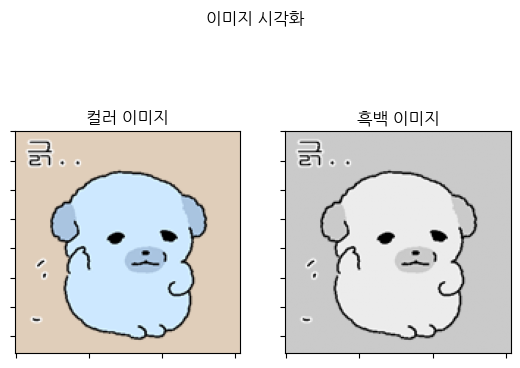

In [66]:
## 이미지 시각화
fig, axes = plt.subplots(1,2, sharey=True)
print(axes)

axes[0].imshow(org_img)
axes[0].set_title('컬러 이미지')
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])


axes[1].imshow(gray_img, cmap='grey')
axes[1].set_title('흑백 이미지')
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
# plt.imshow(org_img)
plt.suptitle("이미지 시각화")
plt.show()

[2] 이미지 출력 및 이벤트 대기 <hr>
- gui 프로그램은 사용자 입력에 따라 프로그램 구동
- 사용자의 키 이벤트에 따라 이미지 출력 창 제어

In [67]:
while True :
    if org_img is not None :
        print('img ok')
        cv2.imshow('org', org_img)     ## 이미지 창 준비 및 띄우기
        k = cv2.waitKey()
        if k == ord('s') :
            ret = cv2.imwrite('./copy.png', org_img)
            print(f'save ok!') if ret else print(f'save x!')
        if k == ord('x') :
            ret = cv2.imwrite('./copy.png', org_img)
            cv2.destroyAllWindows()
            break
    else :
        print('None image')
        break
        

img ok


[3] 이미지 분리 및 병함 <hr>

In [68]:
## [3-1] opencv의 split() 함수 사용
## - packing 방식
channels = cv2.split(org_img)
print(f'channels : {len(channels)}개 {type(channels[0])}')

## - unpacking 방식
b, g, r = cv2.split(org_img)
print(f'b channel : {type(b)}, {b.shape}')
print(f'g channel : {type(g)}, {g.shape}')
print(f'r channel : {type(r)}, {r.shape}')

channels : 3개 <class 'numpy.ndarray'>
b channel : <class 'numpy.ndarray'>, (152, 154)
g channel : <class 'numpy.ndarray'>, (152, 154)
r channel : <class 'numpy.ndarray'>, (152, 154)


In [69]:
cv2.imshow("b", b)
cv2.imshow("g", g)
cv2.imshow("r", r)

cv2.waitKey()
cv2.destroyAllWindows()




In [70]:
## [3-2] ndarray로 채널 분리
print(f'shape -> {org_img.shape}')

## 축변경
## ndarray.shape(321, 380, 3)

org_img2 =org_img.transpose(2,0,1)
display(org_img2.shape)

shape -> (152, 154, 3)


(3, 152, 154)

In [71]:
## b, g, r 채널 분리
blueArray = org_img2[0, :, :]
greenArray = org_img2[1]
redArray = org_img2[2]


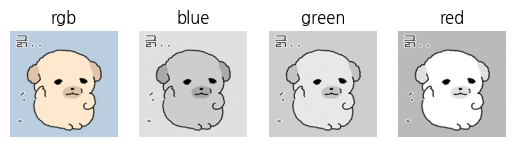

In [77]:
## 채널별 시각화
titles = ['rgb', 'blue', 'green', 'red']
rawimg = [org_img[:, :, ::-1], org_img2[0],org_img2[1], org_img2[2]]

fig, axes = plt.subplots(1,4, sharey =True)
for idx ,ax in enumerate(axes) :
    ax.imshow(rawimg[idx], cmap='grey')
    ax.set_title(titles[idx])
    ax.axis('off')

[4] 이미지 데이터 병합<hr>

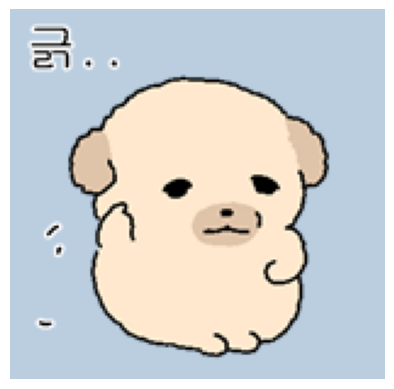

In [73]:
## ============================================
## [4-1] 병합관련 함수 cv2.merge()
## ============================================
img_rgb = cv2.merge((redArray ,greenArray, blueArray ))
# print(img_rgb)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


